<h1>Analyzing Historical Stock/Revenue Data and Building a Dashboard</h1>

Pre-requisite codes

In [2]:
!mamba install bs4==4.10.0 -y
!mamba install html5lib==1.1 -y 
!pip install lxml==4.6.4

import pandas as pd
import requests
from bs4 import BeautifulSoup

import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)


                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████████████████████████████████████████████████


Looking for: ['bs4==4.10.0']

[+] 0.0s
[+] 0.1s
pkgs/main/linux-64 ━━━━━━━╸━━━━━━━━━━━━━━━━━   0.0 B /  ??.?MB @ 

In [36]:
!pip install yfinance
!pip install yfinance matplotlib
import yfinance as yf
import matplotlib.pyplot as plt

<h2>Question 1: Use yfinance to Extract Stock Data</h2>

Reset the index, save, and display the first five rows of the `tesla_data` dataframe using the `head` function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [18]:
tesla_yahoo = yf.Ticker("TSLA")

In [21]:
tesla_data = tesla_yahoo.history(period="max")

In [22]:
tesla_data.reset_index(inplace=True)
tesla_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


<h2>Question 2: Use Webscraping to Extract Tesla Revenue Data</h2>

Display the last five rows of the `tesla_revenue` dataframe using the `tail` function. Upload a screenshot of the results.

In [30]:
tesla_financials = tesla_yahoo.financials
tesla_object = tesla_yahoo.financials.loc['Total Revenue']
tesla_revenue = tesla_object.to_frame()

In [31]:
tesla_revenue.tail()

,Total Revenue
2023-12-31,96773000000.0
2022-12-31,81462000000.0
2021-12-31,53823000000.0
2020-12-31,31536000000.0
2019-12-31,NaN


<h2>Question 3: Use yfinance to Extract Stock Data</h2>

Reset the index, save, and display the first five rows of the `gme_data` dataframe using the `head` function. Upload a screenshot of the results and code from the beginning of Question 1 to the results below.

In [32]:
gme_yahoo = yf.Ticker("GME")
gme_data = gme_yahoo.history(period="max")
gme_data.reset_index(inplace=True)
gme_data.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2002-02-13 00:00:00-05:00,1.620128,1.693349,1.603295,1.691666,76216000,0.0,0.0
1,2002-02-14 00:00:00-05:00,1.712707,1.716073,1.670625,1.683250,11021600,0.0,0.0
2,2002-02-15 00:00:00-05:00,1.683250,1.687458,1.658002,1.674834,8389600,0.0,0.0
3,2002-02-19 00:00:00-05:00,1.666418,1.666418,1.578047,1.607504,7410400,0.0,0.0
4,2002-02-20 00:00:00-05:00,1.615921,1.662210,1.603296,1.662210,6892800,0.0,0.0


<h2>Question 4: Use Webscraping to Extract GME Revenue Data</h2>

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Upload a screenshot of the results.

In [33]:
gme_financials = gme_yahoo.financials
gme_object = gme_yahoo.financials.loc['Total Revenue']
gme_revenue = gme_object.to_frame()
gme_revenue.tail()

,Total Revenue
2024-01-31,5272800000.0
2023-01-31,5927200000.0
2022-01-31,6010700000.0
2021-01-31,5089800000.0
2020-01-31,NaN


<h2>Question 5: Plot Tesla Stock Graph</h2>

Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph.

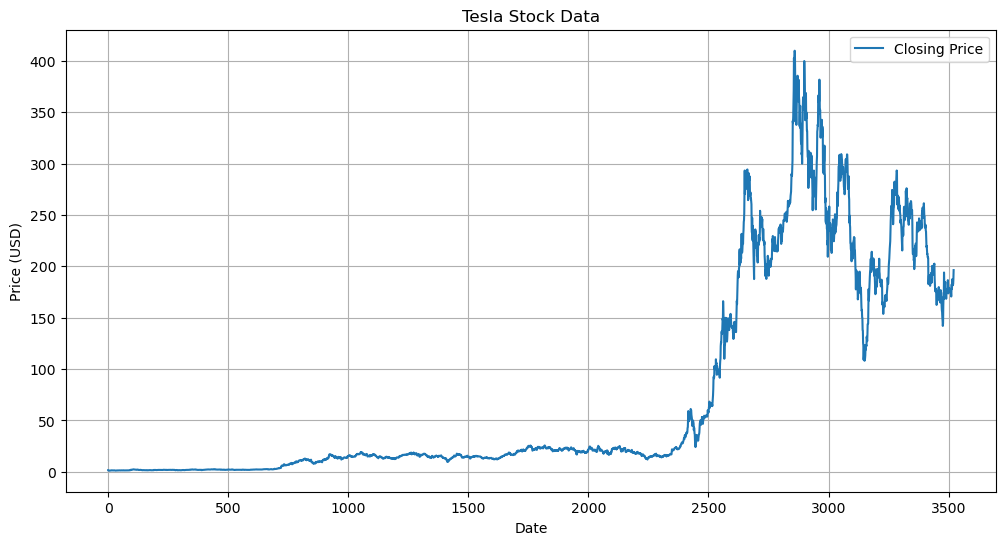

In [37]:
def make_graph(data, title="Stock Data"):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'], label='Closing Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
make_graph(tesla_data, title="Tesla Stock Data")

<h2>Question 6: Plot GameStop Stock Graph</h2>

Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph.

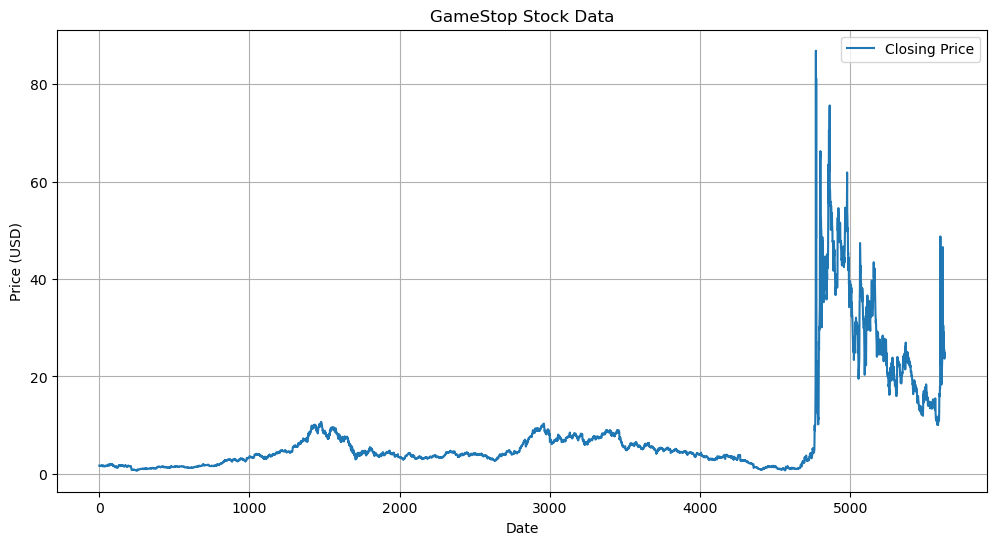

In [38]:
make_graph(gme_data, title="GameStop Stock Data")